In [1]:
%load_ext autoreload
%autoreload 2

import sys, os, pickle, time, warnings
import numpy as np, pandas as pd, scipy, scipy.stats as stats, tqdm, h5py

# Plotting modules
import matplotlib, corner
from pylab import cm
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [2]:
# Plotting modules
font = {'family' : 'serif', 'weight' : 'normal',
        'size'   : 16}
legend = {'fontsize': 16}
matplotlib.rc('font', **font)
matplotlib.rc('legend', **legend)
plt.rc('text', usetex=True)
plt.rc('axes', labelsize=16)
plt.rc('xtick',labelsize=16)
plt.rc('ytick',labelsize=16)
plt.rc('legend',fontsize=16)

cm_default = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Model Description

### Position distribution
Vertical distribution is exponentially decreasing: $$z \sim \exp(-\frac{z}{h})$$

Substituting in distance and latitude, the probability distribution as a function of distance is Exponentially Decreasing Square Distance (EDSD).
$$\mathrm{P}(s,b) \,\mathrm{d}s\, \mathrm{d}b \propto s^2 \cos(b) \exp\left(-\frac{s \sin(b)}{h}\right) \, \mathrm{d}s  \, \mathrm{d}b $$

### Brightness distribution
The inital mass distribution is drawn from a power law function, similar to a single regime of the Kroupa IMF down to a minimum mass in order to keep the distribution finite
$$\mathrm{P}(\mathcal{M}) \,\mathrm{d}\mathcal{M} \propto 
\begin{cases} 
\mathcal{M}^{-\gamma} \quad \mathrm{where} \quad\mathcal{M}>\mathcal{M}_\mathrm{min}\\
0 \quad\quad \mathrm{otherwise.}
\end{cases}
$$

The source luminosity is related to the mass through a constant power law with power $a$.
Propagating this through to the absolute magnitude, this is related to the mass through
$$M = -2.5a\log10(\mathcal{M})$$
Therefore, combining this with the power law mass distribution, the absolute magnitude distribution is given by
$$\mathrm{P}(M)\,\mathrm{d}M = \exp{\left(\frac{(\gamma-1)\log(10)M}{2.5a}\right)} \,\mathrm{d}M$$
and the minimum mass now marks a maximum absolute magnitude.

### Measurement error
The parallax measurement error is drawn from a $\Gamma$ distribution with $\alpha=1, \beta=2$. Observed parallaxes are drawn from a Gaussian distribution with mean $\varpi_\mathrm{true}$, variance $\sigma_\varpi^2$.

Apparent magnitude error is drawn from a $\Gamma$ distribution with $\alpha=1.5, \beta=3$. Observed parallaxes are drawn from a Gaussian distribution with mean $G_\mathrm{true}$, variance $\sigma_G^2$.

# Load in data

In [14]:
sample = {}
filename = '/data/asfe2/Projects/mwtrace_data/mockmodel/sample.h'
with h5py.File(filename, 'r') as hf:
    for key in hf['sample'].keys():
        sample[key] = hf['sample'][key][...]

In [15]:
selection = sample['m_obs']<18

# Plot data with errors and selection

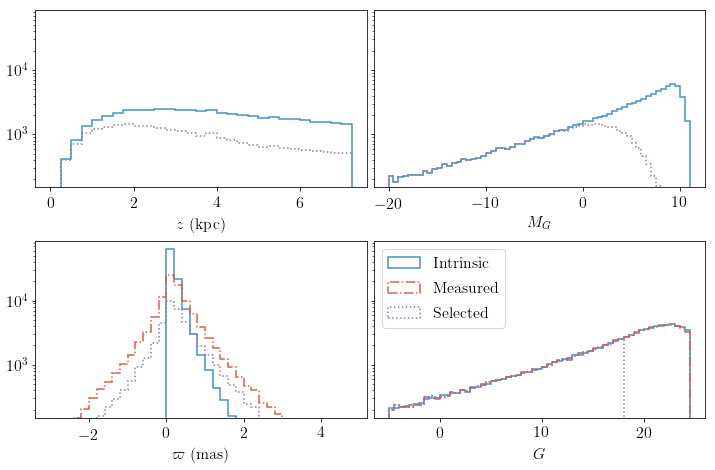

In [16]:
fig, axes = plt.subplots(2,2,figsize=(12,7.5), sharey=True)

lw=1.5

plt.sca(axes[0,0])
sbins = np.arange(0,7.5,0.25)
plt.hist(sample['s']*sample['sinb'], bins=sbins,
         color=cm.RdBu(0.8), linestyle='-', linewidth=lw, histtype='step');
plt.hist((sample['s']*sample['sinb'])[selection], bins=sbins,
         color=cm.PRGn(0.2), linestyle=':', linewidth=lw, histtype='step');
plt.xlabel(r'$z$ (kpc)')

plt.sca(axes[0,1])
Mbins = np.arange(-20,11.1,0.5)
plt.hist(sample['M'], bins=Mbins,
         color=cm.RdBu(0.8), linestyle='-', linewidth=lw, histtype='step');
plt.hist(sample['M'][selection], bins=Mbins,
         color=cm.PRGn(0.2), linestyle=':', linewidth=lw, histtype='step');
plt.xlabel(r'$M_G$')

plt.sca(axes[1,0])
pbins = np.arange(-3,5,0.2)
plt.hist(1/sample['s'], bins=pbins,
         color=cm.RdBu(0.8), linestyle='-', linewidth=lw, histtype='step');
plt.hist(sample['parallax_obs'], bins=pbins,
         color=cm.RdBu(0.2), linestyle='-.', linewidth=lw, histtype='step');
plt.hist(sample['parallax_obs'][selection], bins=pbins,
         color=cm.PRGn(0.2), linestyle=':', linewidth=lw, histtype='step');
plt.xlabel(r'$\varpi$ (mas)')

plt.sca(axes[1,1])
Gbins = np.arange(-5,25,0.5)
plt.hist(sample['m'], bins=Gbins,
         color=cm.RdBu(0.8), linestyle='-', linewidth=lw, histtype='step', label='Intrinsic');
plt.hist(sample['m_obs'], bins=Gbins,
         color=cm.RdBu(0.2), linestyle='-.', linewidth=lw, histtype='step', label='Measured');
plt.hist(sample['m_obs'][selection], bins=Gbins,
         color=cm.PRGn(0.2), linestyle=':', linewidth=lw, histtype='step', label='Selected');
plt.xlabel(r'$G$')
plt.legend(loc='upper left')

plt.yscale('log')
plt.subplots_adjust(wspace=0.02, hspace=0.3)